# Plotting Sigmoid Function

### 2D Sigmoid

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def sigmoid(x,w,b):
  return 1/(1+np.exp(-(w*x+b)))

In [0]:
sigmoid(1,0.5,0)

0.6224593312018546

In [0]:
# Now plot curve

w = 0.9
b = 0.1
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

In [0]:
print("X type is ",type(X))
print("Y type is ",type(Y))

X type is  <class 'numpy.ndarray'>
Y type is  <class 'numpy.ndarray'>


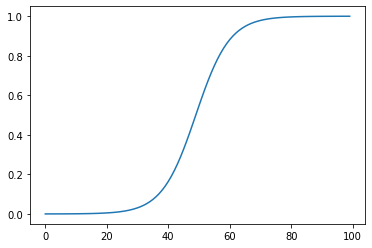

In [0]:
plt.plot(Y)

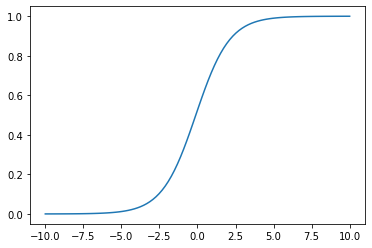

In [0]:
plt.plot(X,Y)
plt.show()

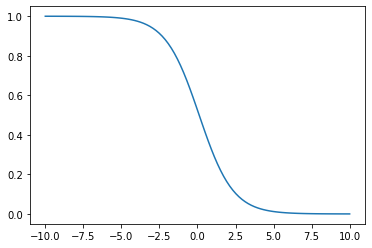

In [0]:
# Negative weight inverts sigmoid curve

w = -0.9
b = 0.1
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)
plt.plot(X,Y)
plt.show()

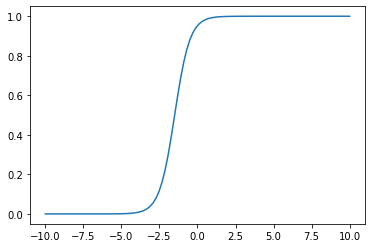

In [0]:
# Increasing bias (b) shifts curve to the left if w is positive and right if w is negative.

w = 2  #@param {type: "slider", min: -2, max: 2, step:0.1}
b = 3
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)
plt.plot(X,Y)
plt.show()

Basically, w decides rate of fall between the extremes.  
And b decides the position of the fall with respect to origin.

### 3D Sigmoid

In [0]:
def sigmoid_3d(x1, x2, w1,w2,b):
  return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [0]:
X1 = np.linspace(5,10,5)
X2=np.linspace(20,30,5)


XX1, XX2 = np.meshgrid(X1, X2) # Generates all possible combinations of X1 and X2 

In [0]:
X1

array([ 5.  ,  6.25,  7.5 ,  8.75, 10.  ])

In [0]:
X2

array([20. , 22.5, 25. , 27.5, 30. ])

In [0]:
XX1

array([[ 5.  ,  6.25,  7.5 ,  8.75, 10.  ],
       [ 5.  ,  6.25,  7.5 ,  8.75, 10.  ],
       [ 5.  ,  6.25,  7.5 ,  8.75, 10.  ],
       [ 5.  ,  6.25,  7.5 ,  8.75, 10.  ],
       [ 5.  ,  6.25,  7.5 ,  8.75, 10.  ]])

In [0]:
XX2

array([[20. , 20. , 20. , 20. , 20. ],
       [22.5, 22.5, 22.5, 22.5, 22.5],
       [25. , 25. , 25. , 25. , 25. ],
       [27.5, 27.5, 27.5, 27.5, 27.5],
       [30. , 30. , 30. , 30. , 30. ]])

In [0]:
w1 = 0.3
w2 = 0.5
b = 2
sigmoid_3d(XX1, XX2, w1, w2, b)

# Note : gives output for each input feature a value between 0 and 1 (the predicted value for that particular w1, w2, b)

array([[0.00247262, 0.01098694, 0.04742587, 0.18242552, 0.5       ],
       [0.02931223, 0.11920292, 0.37754067, 0.73105858, 0.92414182],
       [0.26894142, 0.62245933, 0.88079708, 0.97068777, 0.99330715],
       [0.81757448, 0.95257413, 0.98901306, 0.99752738, 0.99944722],
       [0.98201379, 0.99592986, 0.99908895, 0.99979657, 0.9999546 ]])

# Sigmoid neuron Class

In [0]:
# Class for signmoid neuron

class SigmoidNeuron:
  def __init__(self): # initialise the parameters
    self.w=None
    self.b=None
  
  # Computing the sigmoid function - split into 2 steps -> perceptron + sigmoid (which works on top of sigmoid)
  def perceptron(self,x): #vectors
    return np.dot(x,self.w.T)+self.b

  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x)) # ".0" to allow floating point numbers

  # Computing gradient with current parameters(w,b) at point(x,y-pred) [no such thing as x-pred]
  def grad_w(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)*x

  def grad_b(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)

  # Fitting parameters into model
  def fit(self, X, Y, epochs = 1, lr = 1, initialise = True):
    # Step 1: initialise w and b
    if initialise:
      self.w = np.random.randn(1,X.shape[1]) # 1 row and as many weights as parameters (X's shape is (number of experiments,number of parameters = no. of wts))
      self.b = 0

    
    for i in range(epochs):
      dw = 0
      db = 0
      # Computing gradients
      for x,y in zip(X,Y): # X and Y are the actual (x,y)'s
        dw+=self.grad_w(x,y) # the actual (correct) values of x and y. We find the y_pred in the function (which we are calling) itself.
        db+=self.grad_b(x,y)
      self.w -= lr*dw # "Subtract" gradient
      self.b -= lr*db

# Toy Dataset

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

In [0]:
X = np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,-1.25],[-2,-4],[1,5]])
Y = [1,1,1,0,0,0]
sn = SigmoidNeuron()

In [0]:
sn.fit(X,Y,1,0.25)

In [0]:
# Compute predicted y's for the model just trained (using sn.fit)

def plot_sn(X,Y,sn):
  # all this for plotting purposes
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j],X2[i]])
      YY[i,j] = sn.sigmoid(sn.perceptron(val)) # Compute y for this value of x
  plt.contourf(XX1, XX2, YY, cmap='viridis', alpha=0.6)
  plt.scatter(X[:,0],X[:,1],c=Y)
  plt.plot()

[[ 0.68488075 -0.18958531]] [-0.01613611]
[[ 0.80576203 -0.29705343]] [-0.08024243]
[[ 0.93595063 -0.26404063]] [-0.13565419]
[[ 0.99545896 -0.36721495]] [-0.18856736]
[[ 1.09276777 -0.32264436]] [-0.23214543]
[[ 1.13637178 -0.39943071]] [-0.27537084]
[[ 1.2062086  -0.37879174]] [-0.31127962]
[[ 1.24812497 -0.41853937]] [-0.34618801]
[[ 1.29785435 -0.42160602]] [-0.37684107]
[[ 1.33779644 -0.44020071]] [-0.40574856]
[[ 1.37690839 -0.45103282]] [-0.43225123]
[[ 1.41248097 -0.46314888]] [-0.45699237]
[[ 1.44586343 -0.4739    ]] [-0.48006413]
[[ 1.47710271 -0.48407616]] [-0.50168008]
[[ 1.50648925 -0.49362534]] [-0.52198938]
[[ 1.53421951 -0.50263394]] [-0.54112631]
[[ 1.56046586 -0.51115729]] [-0.55920598]
[[ 1.58537483 -0.51924398]] [-0.57632838]
[[ 1.60907248 -0.52693562]] [-0.59258072]
[[ 1.63166802 -0.53426821]] [-0.60803947]


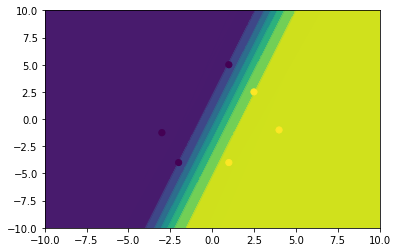

In [0]:
sn.fit(X,Y,1,0.5, True) # Only first time when sigmoid model created, initialise

# Similar to running epochs, just that we want to plot after each epoch, so instead of running epochs inside the model, we run it over here (by passing epochs=1)
for i in range(20):
  print(sn.w, sn.b)
  plot_sn(X, Y, sn)
  sn.fit(X, Y, 1, 0.5, False)

In [0]:
# Plots are overlapping, so use "subplots"

def plot_sn(X,Y,sn, ax):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j],X2[i]])
      YY[i,j] = sn.sigmoid(sn.perceptron(val)) # Compute y for this value of x
  ax.contourf(XX1, XX2, YY, cmap='viridis', alpha=0.6)
  ax.scatter(X[:,0],X[:,1],c=Y)
  ax.plot()

[[-0.42438053 -0.52695731]] [0.0042761]
[[-0.36802804 -0.51462903]] [0.00863641]
[[-0.30686493 -0.49955462]] [0.01293021]
[[-0.24118126 -0.4810535 ]] [0.01692456]
[[-0.17172068 -0.45840277]] [0.02031227]
[[-0.09968401 -0.43101927]] [0.02275869]
[[-0.02662471 -0.39876678]] [0.02398062]
[[ 0.04568385 -0.36233368]] [0.02381731]
[[ 0.11534189 -0.32352637]] [0.02225519]
[[ 0.18046644 -0.28521181]] [0.01941342]
[[ 0.23952592 -0.25064416]] [0.01551674]
[[ 0.29175916 -0.22233086]] [0.01084938]
[[ 0.33732072 -0.20123035]] [0.0056848]
[[ 0.37700973 -0.18687756]] [0.00023066]
[[ 0.41185044 -0.17807855]] [-0.0053814]
[[ 0.44280622 -0.17351793]] [-0.01107664]
[[ 0.47067092 -0.17205353]] [-0.01681426]
[[ 0.49606202 -0.172791  ]] [-0.0225713]
[[ 0.51944973 -0.1750634 ]] [-0.02833368]
[[ 0.54119109 -0.1783851 ]] [-0.03409163]
[[ 0.56155886 -0.18240677]] [-0.03983764]
[[ 0.58076358 -0.18687892]] [-0.04556553]
[[ 0.59896977 -0.19162431]] [-0.05127003]
[[ 0.61630767 -0.19651775]] [-0.05694663]
[[ 0.63288

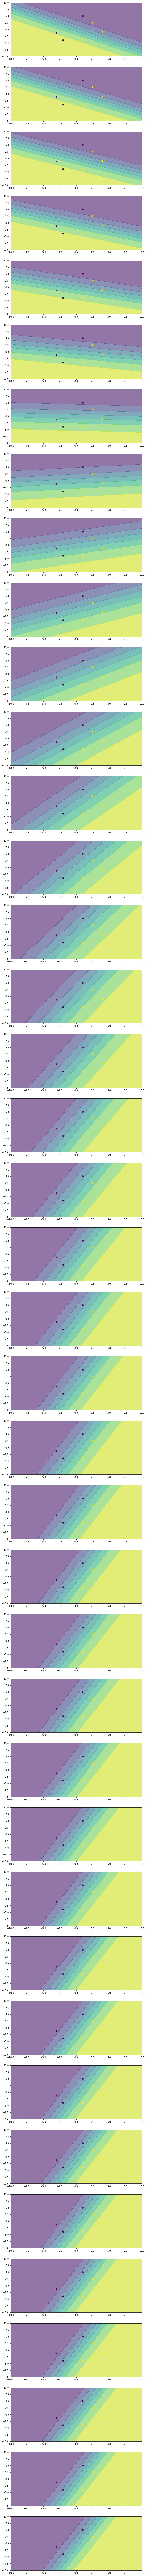

In [0]:
sn.fit(X,Y,1,0.05, True) # Only first time when sigmoid model created, initialise
N=40
plt.figure(figsize=(10, N*5))

for i in range(40):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i+1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.05, False)

### Note that the linearly separable data is appropriately separated (decision boundary)
Each stage represents the model learning

## Effect of large learning rates

[[0.48906814 1.5336927 ]] [0.07196708]
[[0.6709299  1.48173791]] [0.11770293]
[[0.74465376 1.45232016]] [0.13774165]
[[0.79126751 1.42700276]] [0.15161824]
[[0.82569585 1.40233791]] [0.16295126]
[[0.85328236 1.37693216]] [0.173065]
[[0.87660474 1.34989863]] [0.18263758]
[[0.89715377 1.3204546 ]] [0.19211088]
[[0.91592688 1.28773899]] [0.20184294]
[[0.93369672 1.25066508]] [0.2121887]
[[0.95116874 1.20773245]] [0.22356607]
[[0.96911389 1.15671881]] [0.23653879]
[[0.98853694 1.09410538]] [0.2519545]
[[1.01096797 1.01390103]] [0.27121431]
[[1.0390592  0.90504792]] [0.2968481]
[[1.07782062 0.74563718]] [0.33371582]
[[1.13548402 0.49562659]] [0.38977948]
[[1.20132612 0.16300576]] [0.45341751]
[[ 1.20120548 -0.09811419]] [0.44407034]
[[ 1.1673958  -0.41552171]] [0.36807304]


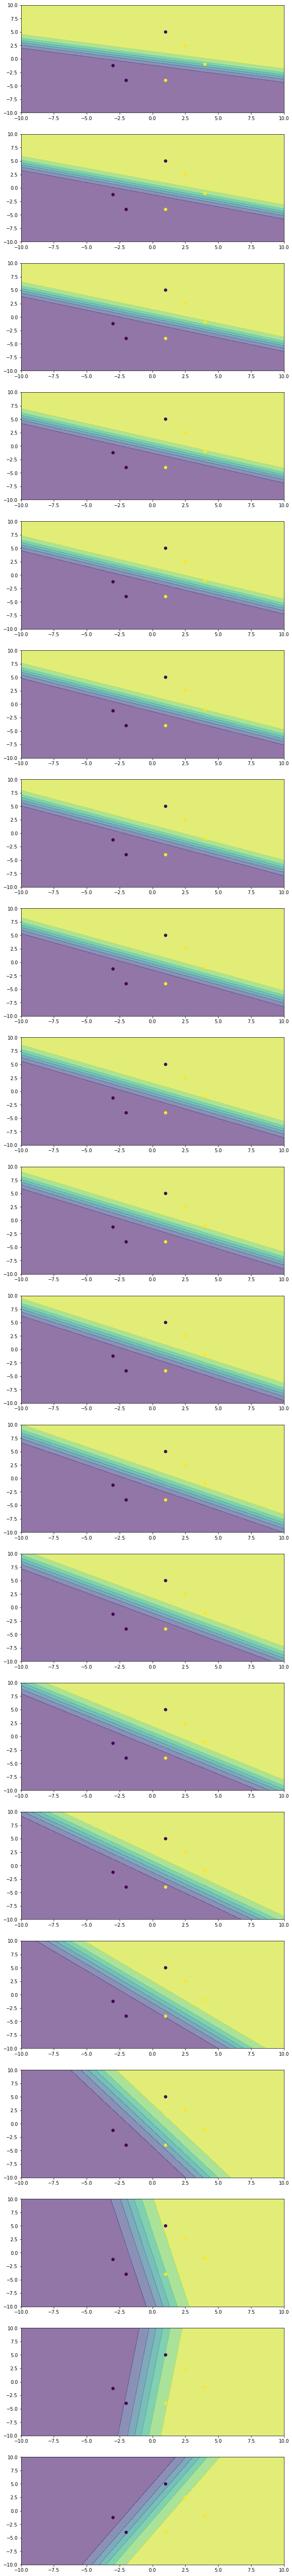

In [0]:
sn.fit(X,Y,1,0.5, True) # Only first time when sigmoid model created, initialise
N=20
plt.figure(figsize=(10, N*5))

for i in range(20):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i+1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)

### Thus, smaller learning rates take more epochs

# Sigmoid neuron using Cross Entropy Loss Function

### (Previously, had used Squared Error Loss Function)

Only things that change:
1. grad_w
2. grad_b <br>
which are dependent on loss - which is what has changed in this case (Squared error -> Cross entropy)

In [0]:
# Class for signmoid neuron

class SigmoidNeuron:
  def __init__(self): # initialise the parameters
    self.w=None
    self.b=None
  
  # Computing the sigmoid function - split into 2 steps -> perceptron + sigmoid (which works on top of sigmoid)
  def perceptron(self,x): #vectors
    return np.dot(x,self.w.T)+self.b

  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x)) # ".0" to allow floating point numbers

  # Computing gradient with current parameters(w,b) at point(x,y-pred) [no such thing as x-pred]
  def grad_w(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred-y)*x

  def grad_b(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred-y)

  # Fitting parameters into model
  def fit(self, X, Y, epochs = 1, lr = 1, initialise = True):
    # Step 1: initialise w and b
    if initialise:
      self.w = np.random.randn(1,X.shape[1]) # 1 row and as many weights as parameters (X's shape is (number of experiments,number of parameters = no. of wts))
      self.b = 0

    
    for i in range(epochs):
      dw = 0
      db = 0
      # Computing gradients
      for x,y in zip(X,Y): # X and Y are the actual (x,y)'s
        dw+=self.grad_w(x,y) # the actual (correct) values of x and y. We find the y_pred in the function (which we are calling) itself.
        db+=self.grad_b(x,y)
      self.w -= lr*dw # "Subtract" gradient
      self.b -= lr*db